# Downloading bitcoin prices

In [1]:
# !pip install forex-python

In [2]:
from forex_python.bitcoin import BtcConverter

b = BtcConverter()

In [3]:
from datetime import datetime

start = datetime(2015,1,1)
end = datetime(2023,8,3)

In [4]:
price_data = b.get_previous_price_list("USD",start,end)

In [5]:
len(price_data)

2719

In [6]:
type(price_data)

dict

# Reading bitcoin prices into pandas

In [7]:
import pandas as pd

# Sample items()
list(price_data.items())[:10]

[('2015-01-01', 313.9247),
 ('2015-01-02', 314.5916),
 ('2015-01-03', 279.8507),
 ('2015-01-04', 263.6343),
 ('2015-01-05', 272.9486),
 ('2015-01-06', 285.5759),
 ('2015-01-07', 294.8778),
 ('2015-01-08', 283.2513),
 ('2015-01-09', 288.8441),
 ('2015-01-10', 274.0668)]

In [8]:
prices = pd.DataFrame(price_data.items(),columns=["date","price"])

In [9]:
prices.head()

,date,price
0,2015-01-01,313.9247
1,2015-01-02,314.5916
2,2015-01-03,279.8507
3,2015-01-04,263.6343
4,2015-01-05,272.9486


In [10]:
prices.tail()

,date,price
2714,2022-07-03,19115.5200
2715,2022-07-04,19129.0000
2716,2022-07-05,20205.6075
2717,2022-07-06,19930.8450
2718,2022-07-10,21296.0050


In [11]:
#Convert date column into index column to make dataframe easy to work with
prices = prices.set_index('date')

In [12]:
prices.head()

,price
date,
2015-01-01,313.9247
2015-01-02,314.5916
2015-01-03,279.8507
2015-01-04,263.6343
2015-01-05,272.9486


In [13]:
#loc is inclusive of 2018-01-01
prices.loc["2017-01-01":"2022-07-10"]

,price
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
...,...
2022-07-03,19115.5200
2022-07-04,19129.0000
2022-07-05,20205.6075


# Making simple plot

<AxesSubplot:xlabel='date'>

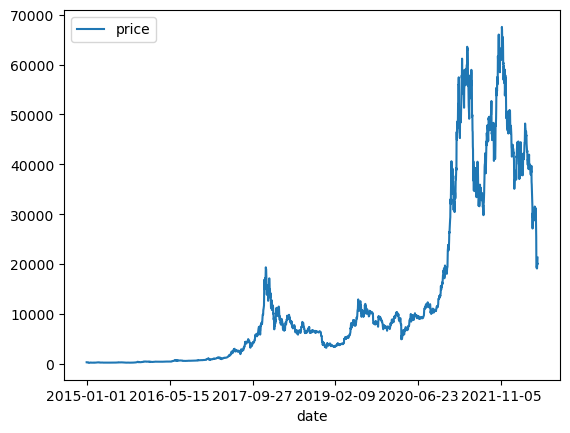

In [14]:
prices.plot()

# Improving plots

In [15]:
#Create rolling mean of 30 days
prices.rolling(30).mean()

,price
date,
2015-01-01,NaN
2015-01-02,NaN
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,NaN
...,...
2022-07-03,28467.331253
2022-07-04,27987.347920
2022-07-05,27592.518170


<AxesSubplot:xlabel='date'>

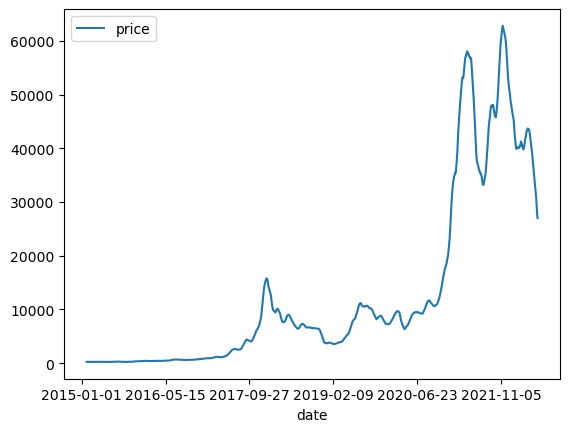

In [16]:
prices.rolling(30).mean().plot()

In [17]:
import matplotlib as plt
import matplotlib.style as style

<AxesSubplot:xlabel='date'>

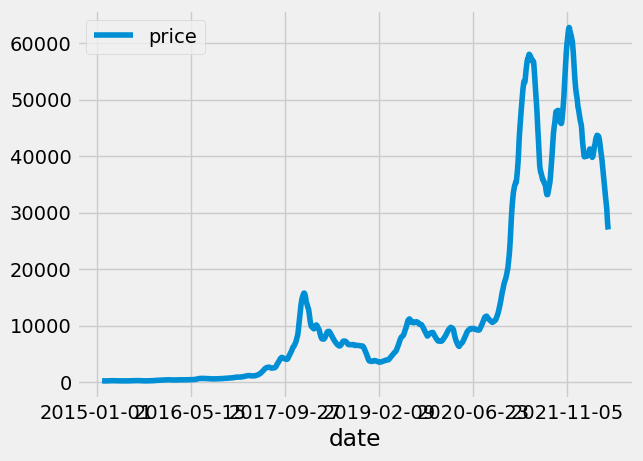

In [18]:
style.use('fivethirtyeight')

rolling = prices.rolling(30).mean()

rolling.plot()

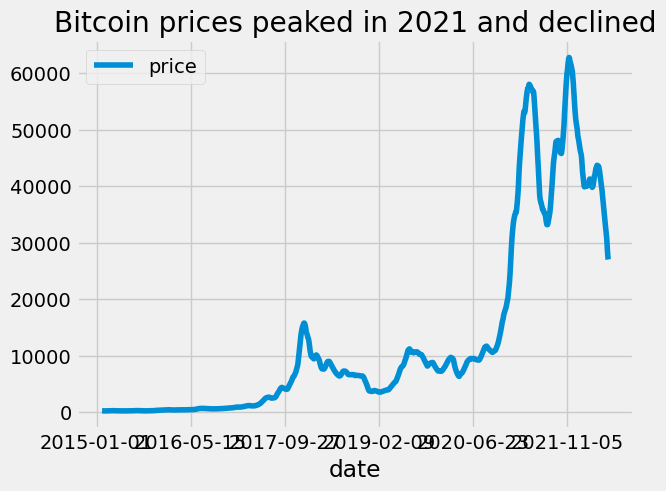

In [19]:
import matplotlib.pyplot as plt

ax = rolling.plot()

plt.title("Bitcoin prices peaked in 2021 and declined")
plt.show()

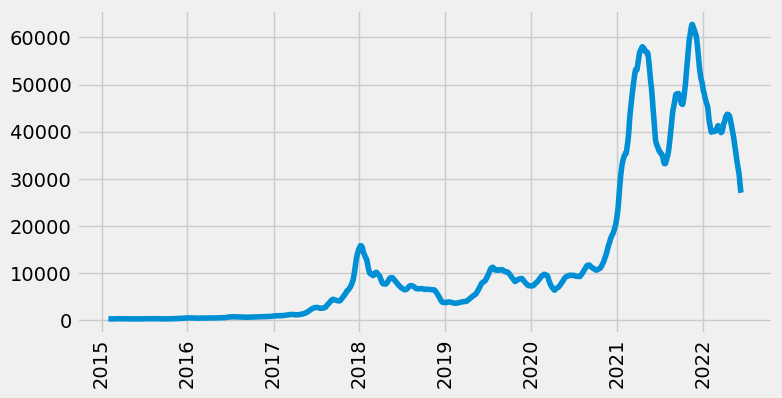

In [20]:
# Create fig to modify canva for x-axis
fig,ax = plt.subplots(figsize=(8,4))

ax.plot(rolling.index.values,rolling["price"], linewidth=4)

ticks = ["2015-01-01","2016-01-01","2017-01-01","2018-01-01","2019-01-01","2020-01-01","2021-01-01","2022-01-01"]
tick_labels = ["2015","2016","2017","2018","2019","2020","2021","2022"]

plt.xticks(ticks,rotation = "vertical")
ax.set_xticklabels(tick_labels)

plt.show()

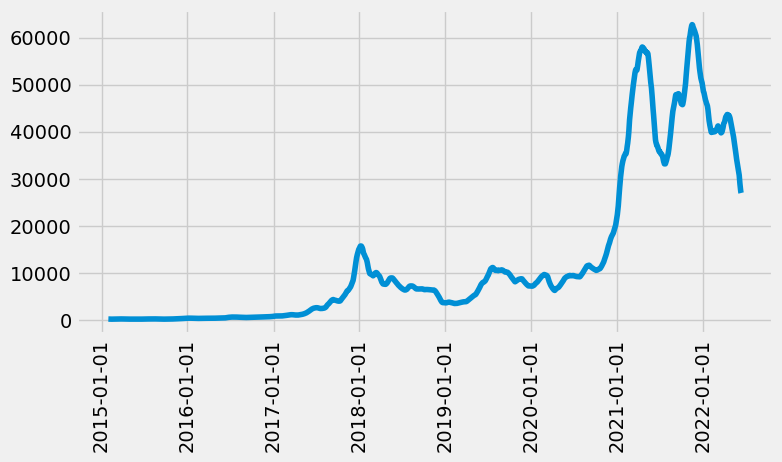

In [21]:
# Sample without setting up xticklabels
fig,ax = plt.subplots(figsize=(8,4))

ax.plot(rolling.index.values,rolling["price"], linewidth=4)

ticks = ["2015-01-01","2016-01-01","2017-01-01","2018-01-01","2019-01-01","2020-01-01","2021-01-01","2022-01-01"]
tick_labels = ["2015","2016","2017","2018","2019","2020","2021","2022"]

plt.xticks(ticks,rotation = "vertical")
# ax.set_xticklabels(tick_labels)

plt.show()

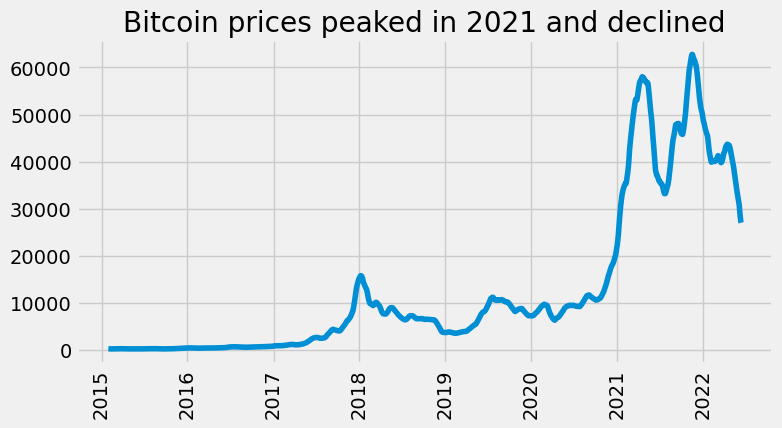

In [22]:
fig,ax = plt.subplots(figsize=(8,4))

ax.plot(rolling.index.values,rolling["price"], linewidth=4)

ticks = ["2015-01-01","2016-01-01","2017-01-01","2018-01-01","2019-01-01","2020-01-01","2021-01-01","2022-01-01"]
tick_labels = ["2015","2016","2017","2018","2019","2020","2021","2022"]

plt.title("Bitcoin prices peaked in 2021 and declined")
plt.xticks(ticks,rotation = "vertical")
ax.set_xticklabels(tick_labels)

plt.show()

In [23]:
# Find the date with the maximum price
max_date = prices['price'].idxmax()
# Get the maximum price
max_price = prices.loc[max_date,'price']
# Print the result
print("The highest price of {} was on {}".format(max_price, max_date))

The highest price of 67544.8733 was on 2021-11-08


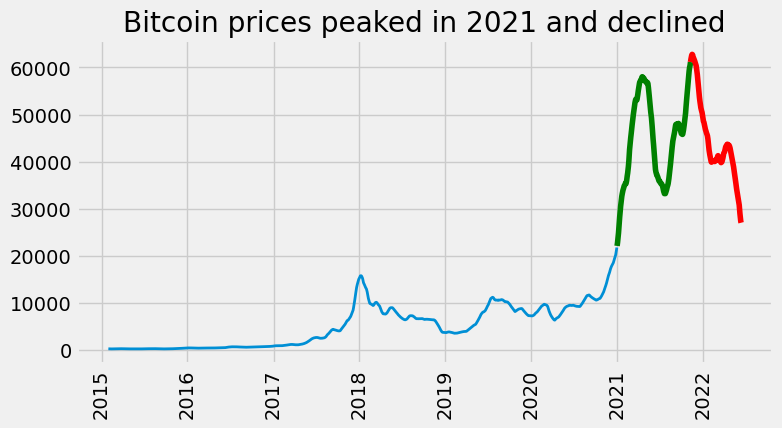

In [24]:
# Draw lines by defining high and low
pre = rolling.loc[:"2020-12-30"]
high = rolling.loc["2020-12-31":"2021-11-08"]
low = rolling.loc["2021-11-08":]

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(pre.index.values,pre["price"],linewidth=2)
ax.plot(high.index.values,high["price"],linewidth=4,color='green')
ax.plot(low.index.values,low["price"],linewidth=4,color='red')

ticks = ["2015-01-01","2016-01-01","2017-01-01","2018-01-01","2019-01-01","2020-01-01","2021-01-01","2022-01-01"]
tick_labels = ["2015","2016","2017","2018","2019","2020","2021","2022"]

plt.title("Bitcoin prices peaked in 2021 and declined")
plt.xticks(ticks,rotation = "vertical")
ax.set_xticklabels(tick_labels)

plt.show()

In [25]:
# add ax.axvspan - highlight the background
pre.shape

(2191, 1)

In [26]:
high.shape

(313, 1)

In [27]:
low.shape

(216, 1)

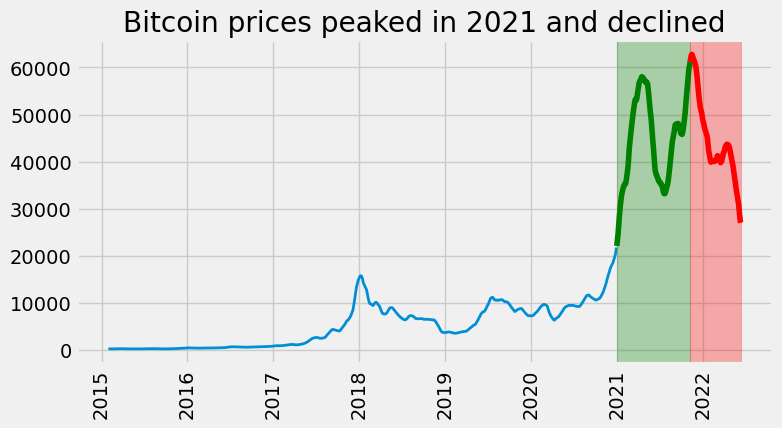

In [28]:
# Draw lines by defining high and low
pre = rolling.loc[:"2020-12-30"]
high = rolling.loc["2020-12-31":"2021-11-08"]
low = rolling.loc["2021-11-08":]

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(pre.index.values,pre["price"],linewidth=2)
ax.plot(high.index.values,high["price"],linewidth=4,color='green')
ax.plot(low.index.values,low["price"],linewidth=4,color='red')
ax.axvspan(xmin=2191,xmax=2191+313,ymin=0,alpha=0.3,color='green')
ax.axvspan(xmin=2191+313,xmax=2191+313+216,ymin=0,alpha=0.3,color='red')

ticks = ["2015-01-01","2016-01-01","2017-01-01","2018-01-01","2019-01-01","2020-01-01","2021-01-01","2022-01-01"]
tick_labels = ["2015","2016","2017","2018","2019","2020","2021","2022"]

plt.title("Bitcoin prices peaked in 2021 and declined")
plt.xticks(ticks,rotation = "vertical")
ax.set_xticklabels(tick_labels)

plt.show()